In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint, complex_ode, ode
from odeintw import odeintw

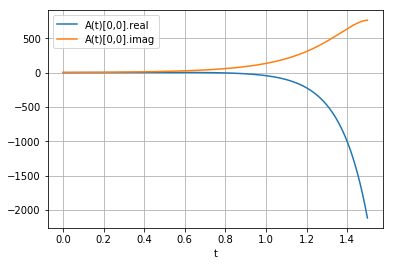

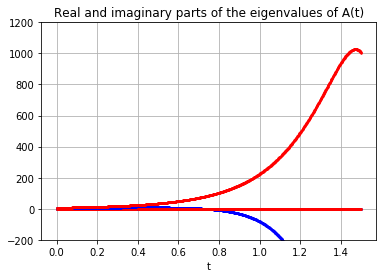

In [54]:
def system(M, t):
    A, B, C = M
    dA_dt = A.dot(C) + B.dot(C)
    dB_dt = B.dot(C)
    dC_dt = C
    return np.array([dA_dt, dB_dt, dC_dt])


t = np.linspace(0, 1.5, 1000)

#A_initial= [1, 2, 2.3, 4.3, 2.1, 5.2, 2.13, 3.43]
A_initial = np.array([[1 + 2.1j, 2 + 5.2j], [2.3 + 2.13j, 4.3 + 3.43j]])

# B_initial= [7, 2.7, 1.23, 3.3, 3.1, 5.12, 1.13, 3]
B_initial = np.array([[7 + 3.1j, 2.7 + 5.12j], [1.23 + 1.13j, 3.3 + 3j]])

# C_initial= [0.5, 0.9, 0.63, 0.43, 0.21, 0.5, 0.11, 0.3]
C_initial = np.array([[0.5 + 0.21j, 0.9 + 0.5j], [0.63 + 0.11j, 0.43 + 0.3j]])

M_initial = np.array([A_initial, B_initial, C_initial])
sol = odeintw(system, M_initial, t)

A = sol[:, 0, :, :]
B = sol[:, 1, :, :]
C = sol[:, 2, :, :]

plt.figure(1)
plt.plot(t, A[:, 0, 0].real, label='A(t)[0,0].real')
plt.plot(t, A[:, 0, 0].imag, label='A(t)[0,0].imag')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('t')

A_evals = np.linalg.eigvals(A)

plt.figure(2)
plt.plot(t, A_evals[:,0].real, 'b.', markersize=3, mec='b')
plt.plot(t, A_evals[:,0].imag, 'r.', markersize=3, mec='r')
plt.plot(t, A_evals[:,1].real, 'b.', markersize=3, mec='b')
plt.plot(t, A_evals[:,1].imag, 'r.', markersize=3, mec='r')
plt.ylim(-200, 1200)
plt.grid(True)
plt.title('Real and imaginary parts of the eigenvalues of A(t)')
plt.xlabel('t')
plt.show()

Text(0.5,0,'t')

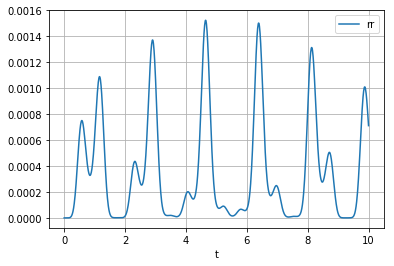

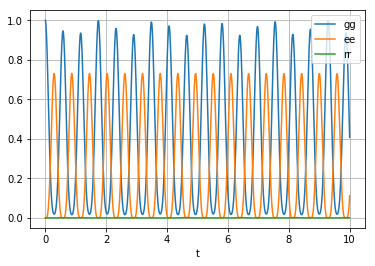

In [120]:
def system(M, t):
    A, B, C = M
    dA_dt = (1/1j)*(A.dot(B) - B.dot(A))
    dB_dt = 0*B
    dC_dt = 0*C
    return np.array([dA_dt, dB_dt, dC_dt])

t = np.linspace(0, 10, 1000)
Omega_1 = 10.0+0*1j
Omega_2 = 1.0+0*1j
Delta_r = 0.0+0*1j
Delta_e = 4.0+0*1j

#A_initial= [1, 2, 2.3, 4.3, 2.1, 5.2, 2.13, 3.43]
A_initial = np.array([[0, 0, 0],
                      [0, 0, 0],
                      [0, 0, 1]])

# B_initial= [7, 2.7, 1.23, 3.3, 3.1, 5.12, 1.13, 3]
B_initial = np.array([[-Delta_r, Omega_2/2, 0],
                      [np.conj(Omega_2)/2, -Delta_e, Omega_1/2],
                      [0, np.conj(Omega_1)/2, 0]])

# C_initial= [0.5, 0.9, 0.63, 0.43, 0.21, 0.5, 0.11, 0.3]
C_initial = np.array([[0, 0, 0],
                      [0, 0, 0],
                      [0, 0, 0]])

M_initial = np.array([A_initial, B_initial, C_initial])
sol = odeintw(system, M_initial, t)

A = sol[:, 0, :, :]
B = sol[:, 1, :, :]
C = sol[:, 2, :, :]

rho_gg = np.conj(A[:, 2, 2])*A[:, 2, 2]
rho_ee = np.conj(A[:, 1, 1])*A[:, 1, 1]
rho_rr = np.conj(A[:, 0, 0])*A[:, 0, 0]

plt.figure(1)
plt.plot(t, rho_rr, label='rr')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('t')

plt.figure(2)
plt.plot(t, rho_gg, label='gg')
plt.plot(t, rho_ee, label='ee')
plt.plot(t, rho_rr, label='rr')
plt.legend(loc='best')
plt.grid(True)
plt.xlabel('t')

In [90]:
temp = np.array([[3, 0, 0],
                 [0, 2-4j, 0],
                 [0, 0, 3+3j]])
np.conj(temp)*temp

array([[ 9.+0.j,  0.+0.j,  0.+0.j],
       [ 0.+0.j, 20.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j, 18.+0.j]])

In [91]:
np.conj(3+3j)*(3+3j)

(18+0j)